# Exploratory Data Analysis on Bikeshare-Weather Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
bikeshare = pd.read_csv('./bikeshare_train_data.csv',parse_dates=['Date'])
bikeshare.sample(5,
                 random_state=604)

,Date,day_length,min_temp,max_temp,mean_temp,temp_diff,hdd,cdd,rain,snow,...,snow_on_ground,max_gust,mean_dep_temp,mean_ret_temp,mean_ride_temp,total_dist,total_duration,ebike_trips,num_trips,adj_num_trips
421,2018-02-26,650.166667,-3.0,6.2,1.6,9.2,16.4,0.0,0.0,0.0,...,1.0,-1.0,6.285219,7.244804,6.765012,1889429.33,1212713.0,0.0,866,1740.685396
1542,2021-03-23,742.200000,1.5,9.1,5.3,7.6,12.7,0.0,0.4,0.0,...,0.0,0.0,11.439911,11.993323,11.716617,3500412.33,1600229.0,0.0,1348,2385.171326
933,2019-07-23,932.250000,14.1,23.6,18.9,9.5,0.0,0.9,0.0,0.0,...,0.0,14.0,25.315606,25.614168,25.464887,13209418.33,5567117.0,0.0,4870,5642.831482
190,2017-07-10,958.250000,15.6,20.8,18.2,5.2,0.0,0.2,0.0,0.0,...,0.0,15.0,22.368867,22.922697,22.645782,7644767.00,3397305.0,0.0,2833,4151.333252
300,2017-10-28,602.166667,4.2,14.0,9.1,9.8,8.9,0.0,0.0,0.0,...,0.0,0.0,15.794030,16.120000,15.957015,5184384.66,2388043.0,0.0,1675,2993.333252


In [3]:
bikeshare.describe()

,Date,day_length,min_temp,max_temp,mean_temp,temp_diff,hdd,cdd,rain,snow,...,snow_on_ground,max_gust,mean_dep_temp,mean_ret_temp,mean_ride_temp,total_dist,total_duration,ebike_trips,num_trips,adj_num_trips
count,2311,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,...,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2.311000e+03,2.311000e+03,2311.000000,2311.000000,2311.000000
mean,2020-03-01 00:00:00,731.499243,6.655971,13.782432,10.242817,7.126460,7.981891,0.224708,2.995024,0.128775,...,0.209433,6.180009,14.877523,15.407977,15.142750,5.627602e+06,2.323338e+06,76.708784,2032.067936,2846.841498
min,2017-01-01 00:00:00,491.133333,-15.300000,-7.800000,-11.600000,0.900000,0.000000,0.000000,-1.400000,0.000000,...,0.000000,-1.000000,-11.600000,-11.600000,-11.600000,1.044550e+05,-7.035573e+08,0.000000,64.000000,0.000000
25%,2018-08-01 12:00:00,575.150000,2.400000,8.500000,5.700000,5.000000,2.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.897602,9.808678,9.326064,2.400379e+06,1.116978e+06,0.000000,996.500000,1871.333252
50%,2020-03-01 00:00:00,730.200000,6.400000,12.900000,9.500000,6.900000,8.500000,0.000000,0.000000,0.000000,...,0.000000,2.000000,13.869965,14.410939,14.160844,4.686750e+06,2.213503e+06,0.000000,1716.000000,2525.304631
75%,2021-09-29 12:00:00,886.233333,11.600000,19.500000,15.600000,9.100000,12.300000,0.000000,3.000000,0.000000,...,0.000000,10.000000,21.026643,21.329948,21.216734,8.388779e+06,3.874863e+06,0.000000,2927.500000,3806.695363
max,2023-04-30 00:00:00,974.266667,20.400000,32.400000,26.400000,16.900000,29.600000,8.400000,67.000000,24.200000,...,22.000000,63.000000,34.604444,34.485657,34.545051,2.038241e+07,4.962362e+08,1456.000000,6145.000000,6579.223677
std,NaN,163.770046,5.834863,6.756233,6.151998,2.865209,5.800444,0.783348,6.457425,1.118266,...,1.561251,9.259443,7.370905,7.097496,7.231917,3.924478e+06,2.206720e+07,241.716865,1281.129412,1253.496658


In [4]:
from sklearn.model_selection import train_test_split

bike_tt, bike_val = train_test_split(bikeshare,
                                     test_size=0.15,
                                    shuffle=True,
                                    random_state=604)

Above we have read in the bikeshare-weather training data as ``bikeshare`` and made a train-test split to set aside some of the training data for validation. For reference, the columns are described as follows:
- ``day_length``: The number of minutes from sunrise to sunset for the given day
- ``min_temp``: The daily minimum temperature (deg C)
- ``max_temp``: The daily maximum temperature (deg C)
- ``mean_temp``: The mean temperature of the day (deg C)
- ``temp_diff``: The difference between the daily minimum and maximum temperatures (deg C)
- ``hdd``: The "Heating Degree Days" of the day, the number of degrees C that the daily average temperature is below 18 degrees C (0 if the daily average temperature is above 18 degrees C)
- ``cdd``: The "Cooling Degree Days" of the day, the number of degrees C that the daily average temperature is above 18 degrees C (0 if the daily average temperature is below 18 degrees C)
- ``rain``: The amount of rain that occurred that day (mm)
- ``snow``: The amount of snow that occurred that day (cm)
- ``total_precip``: The total amount of rain and snow that occurred that day (mm) (Note: the standard conversion of snow-to-rain amount is a factor of ten, so 1cm of snow is equivalent to 1mm of rain; therefore, this column is exactly the sum of ``rain`` and ``snow``)
- ``snow_on_ground``: The amount of snow observed on the ground during the day (cm)
- ``max_gust``: The difference between the speed of the observed maximum gust of wind (in km/hr) and 31 km/hr (0 if the maximum observed gust of wind is at or below 31 km/hr)
- ``mean_dep_temp``: The mean departure temperature of all bike rides taken that day (deg C)
- ``mean_ret_temp``: The mean return temperature of all bike rides taken that day (deg C)
- ``total_dist``: The total distance covered by all bike rides taken that day (m)
- ``total_duration``: The total time spent on bikes that day (sec)
- ``ebike_trips``: The number of bike rides taken on electric bikes that day
- ``num_trips`` The total number of bike rides taken that day, regardless of bicycle type

# Handling Overall Bikeshare Demand

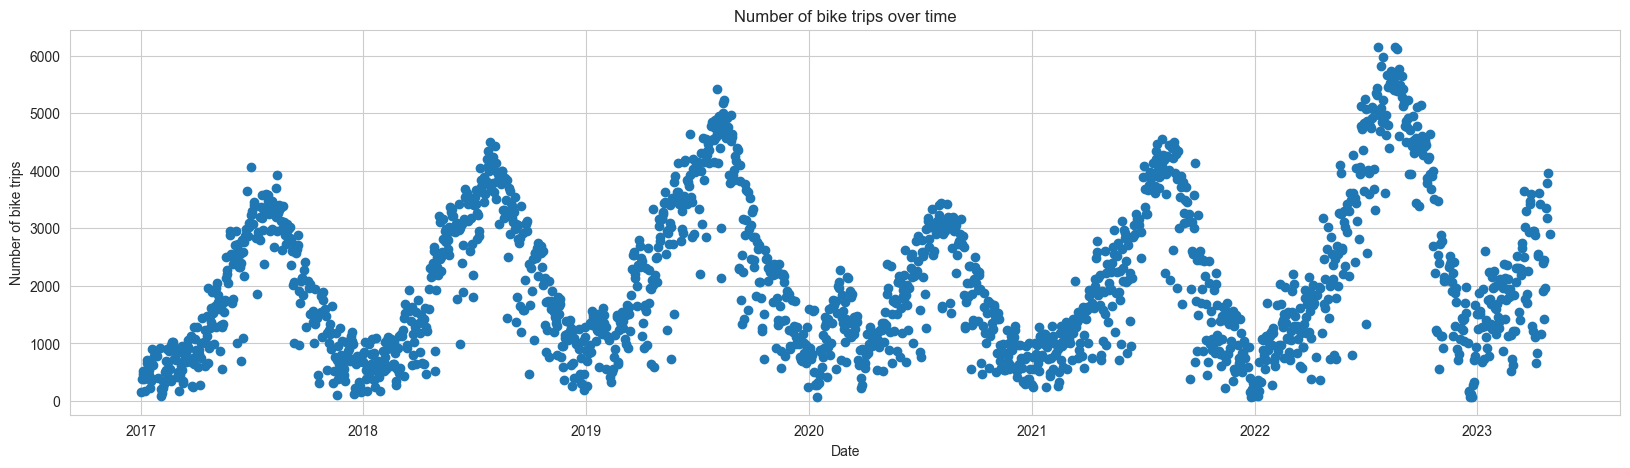

In [5]:
plt.figure("Daily Bike Trips", figsize=(20,5))

plt.plot(bike_tt.Date,
        bike_tt.num_trips,
        'o')

plt.title('Number of bike trips over time')
plt.xlabel('Date')
plt.ylabel('Number of bike trips')

plt.show()

This data, when viewed as a time series, exhibits clear seasonality and some upward trend (with an exception for the COVID outbreak in 2020 and recovery in 2021). In this version of EDA we'll exame how much of this seasonality is captured simply by the temperature. In order to do this we must first correct for the trend coming from pure bikeshare demand.

To look at this trend we have a few options:
- A linear regression from 2017 to 2023,
- Separate linear regressions from 2017 to 2020, 2020 to 2021, and 2021 to 2023-05,
- Separate linear regressions from 2017 to 2020 and 2020 to 2023-05.
- Some other regression fitting a base demand curve.

We will start with the first three.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
## Splitting bike_train into pre-covid data
bike_train_precovid = bikeshare.loc[bikeshare.Date < pd.Timestamp(year=2020,month=2,day=1)]
bike_tt_precovid = bike_tt.loc[bike_tt.Date < pd.Timestamp(year=2020,month=2,day=1)]
bike_val_precovid = bike_val.loc[bike_val.Date < pd.Timestamp(year=2020,month=2,day=1)]

## Post-COVID outbreak
bike_train_postoutbreak = bikeshare.drop(bike_train_precovid.index)
bike_tt_postoutbreak = bike_tt.drop(bike_tt_precovid.index)
bike_val_postoutbreak = bike_val.drop(bike_val_precovid.index)

## We'll use 2020-02 to 2021-05 as the COVID period; 2021-05-12 is roughly when 50% of British Columbia was vaccinated
bike_train_duringcovid = bike_train_postoutbreak.loc[bike_train_postoutbreak.Date < pd.Timestamp(year=2021,month=5,day=12)]
bike_tt_duringcovid = bike_tt_postoutbreak.loc[bike_tt_postoutbreak.Date < pd.Timestamp(year=2021,month=5,day=12)]
bike_val_duringcovid = bike_val_postoutbreak.loc[bike_val_postoutbreak.Date < pd.Timestamp(year=2021,month=5,day=12)]

## For potting let's set up the post-COVID data
bike_train_postcovid = bike_train_postoutbreak.drop(bike_train_duringcovid.index)
bike_tt_postcovid = bike_tt_postoutbreak.drop(bike_tt_duringcovid.index)
bike_val_postcovid = bike_val_postoutbreak.drop(bike_val_duringcovid.index)

In [8]:
demand_precovid = LinearRegression()
demand_precovid.fit(bike_tt_precovid.index.values.reshape(-1,1),
                   bike_tt_precovid.num_trips)

demand_postoutbreak = LinearRegression()
demand_postoutbreak.fit(bike_tt_postoutbreak.index.values.reshape(-1,1),
                       bike_tt_postoutbreak.num_trips)

demand_duringcovid = LinearRegression()
demand_duringcovid.fit(bike_tt_duringcovid.index.values.reshape(-1,1),
                      bike_tt_duringcovid.num_trips)

demand_postcovid = LinearRegression()
demand_postcovid.fit(bike_tt_postcovid.index.values.reshape(-1,1),
                    bike_tt_postcovid.num_trips)

demand_full = LinearRegression()
demand_full.fit(bike_tt.index.values.reshape(-1,1),
               bike_tt.num_trips)

LinearRegression()

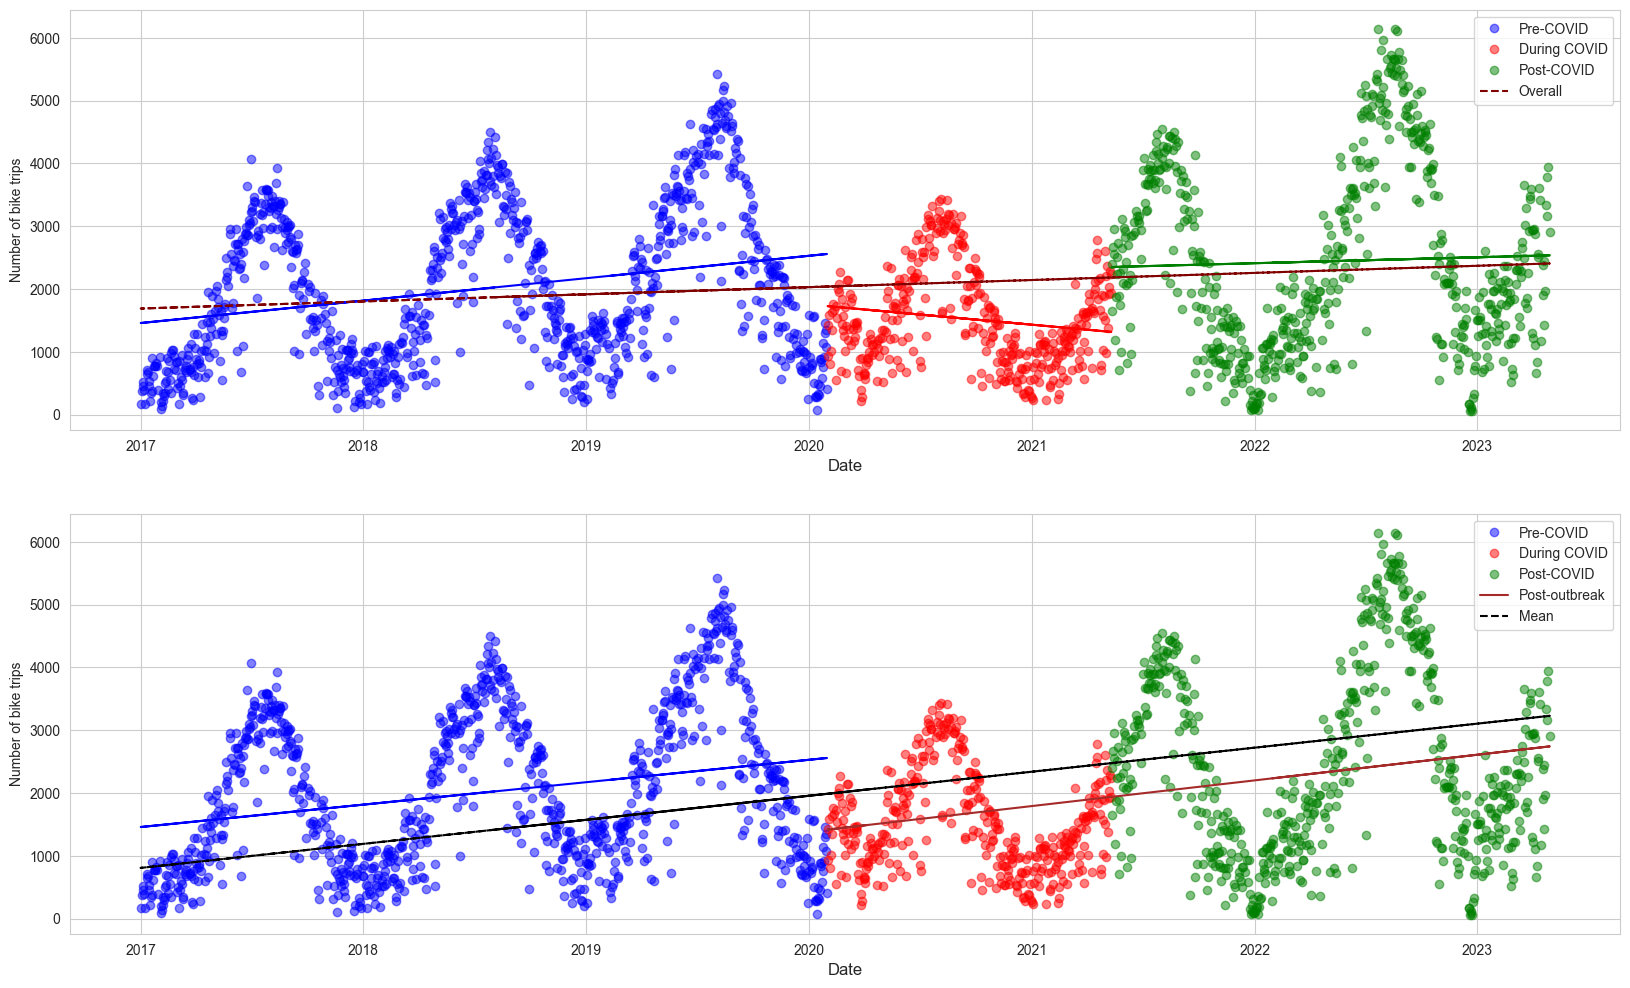

In [9]:
fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(20,12))

ax[0].plot(bike_tt_precovid.Date,
        bike_tt_precovid.num_trips,
        'bo',
        alpha=0.5,
        label='Pre-COVID')

ax[0].plot(bike_tt_duringcovid.Date,
           bike_tt_duringcovid.num_trips,
           'ro',
           alpha=0.5,
           label='During COVID')

ax[0].plot(bike_tt_postcovid.Date,
           bike_tt_postcovid.num_trips,
           'go',
           alpha=0.5,
           label='Post-COVID')

ax[0].plot(bike_tt_precovid.Date,
           demand_precovid.predict(bike_tt_precovid.index.values.reshape(-1,1)),
            'b-')

ax[0].plot(bike_tt_duringcovid.Date,
           demand_duringcovid.predict(bike_tt_duringcovid.index.values.reshape(-1,1)),
            'r-')

ax[0].plot(bike_tt_postcovid.Date,
           demand_postcovid.predict(bike_tt_postcovid.index.values.reshape(-1,1)),
            'g-')

ax[0].plot(bike_tt.Date,
           demand_full.predict(bike_tt.index.values.reshape(-1,1)),
           color='maroon',
          linestyle='--',
          label='Overall')



ax[0].set_xlabel('Date',fontsize=12)
ax[0].set_ylabel('Number of bike trips')
ax[0].legend()

ax[1].plot(bike_tt_precovid.Date,
        bike_tt_precovid.num_trips,
        'bo',
        alpha=0.5,
        label='Pre-COVID')

ax[1].plot(bike_tt_duringcovid.Date,
           bike_tt_duringcovid.num_trips,
           'ro',
           alpha=0.5,
           label='During COVID')

ax[1].plot(bike_tt_postcovid.Date,
           bike_tt_postcovid.num_trips,
           'go',
           alpha=0.5,
           label='Post-COVID')

ax[1].plot(bike_tt_precovid.Date,
           demand_precovid.predict(bike_tt_precovid.index.values.reshape(-1,1)),
            'b-')

ax[1].plot(bike_tt_postoutbreak.Date,
           demand_postoutbreak.predict(bike_tt_postoutbreak.index.values.reshape(-1,1)),
            color='brown',
            linestyle='-',
            label='Post-outbreak')

ax[1].plot(bike_tt.Date,
          (demand_precovid.predict(bike_tt.index.values.reshape(-1,1))+demand_postoutbreak.predict(bike_tt.index.values.reshape(-1,1)))/2,
            'k--',
           label='Mean')


ax[1].set_xlabel('Date',fontsize=12)
ax[1].set_ylabel('Number of bike trips')
ax[1].legend()


plt.show()

The above plots suggest that the second option discussed above is probably a poor trend prediction scheme. We also cannot simply continue the 2017-2020 trend into the future since it will be very inaccurate in capturing most demand.

On the other hand, using the "Overall" and "Mean" lines in the second plot seem like a better balance between combining pre-covid trend with the covid decrease in bikeshare demand.

Let us compare ``Overall`` and ``Mean`` by their root mean squared errors.

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
overall_pred = demand_full.predict(bike_tt.index.values.reshape(-1,1))
mean_pred = (demand_precovid.predict(bike_tt.index.values.reshape(-1,1)) + demand_postoutbreak.predict(bike_tt.index.values.reshape(-1,1)))/2
actual = bike_tt.num_trips

[np.sqrt(mean_squared_error(actual, overall_pred)), np.sqrt(mean_squared_error(actual, mean_pred))]

[1269.3713823972673, 1362.077612530079]

In [12]:
pred_2018_present = demand_full.predict(bike_tt.index.values[365:].reshape(-1,1))
actual_2018_present = bike_tt.num_trips[365:]
np.sqrt(mean_squared_error(actual_2018_present, pred_2018_present))

1262.95590511127

These are not ridiculously incomparable; the difference of ~100 is not so large given the fact that the "amplitude" of the seasonality factors dips high and low above either of these lines. With the discussion above we'll choose to use the "Overall" prediction so that we have enough of a positive slope to capture future expected demand without overpredicting demand from pre-2020's increases.

Let's compute the RMSE on the validation set:

In [13]:
np.sqrt(mean_squared_error(bike_val.num_trips, demand_full.predict(bike_val.index.values.reshape(-1,1))))

1209.2755632361975

This leads us to our final linear regression-based demand projector, the overall demand trend. Now we will fit it on the entire training set (which is ``bikeshare``), and plot for our visualization.

In [14]:
demand = LinearRegression()
demand.fit(bikeshare.index.values.reshape(-1,1), bikeshare.num_trips)
demand_trend = demand.predict(bikeshare.index.values.reshape(-1,1))

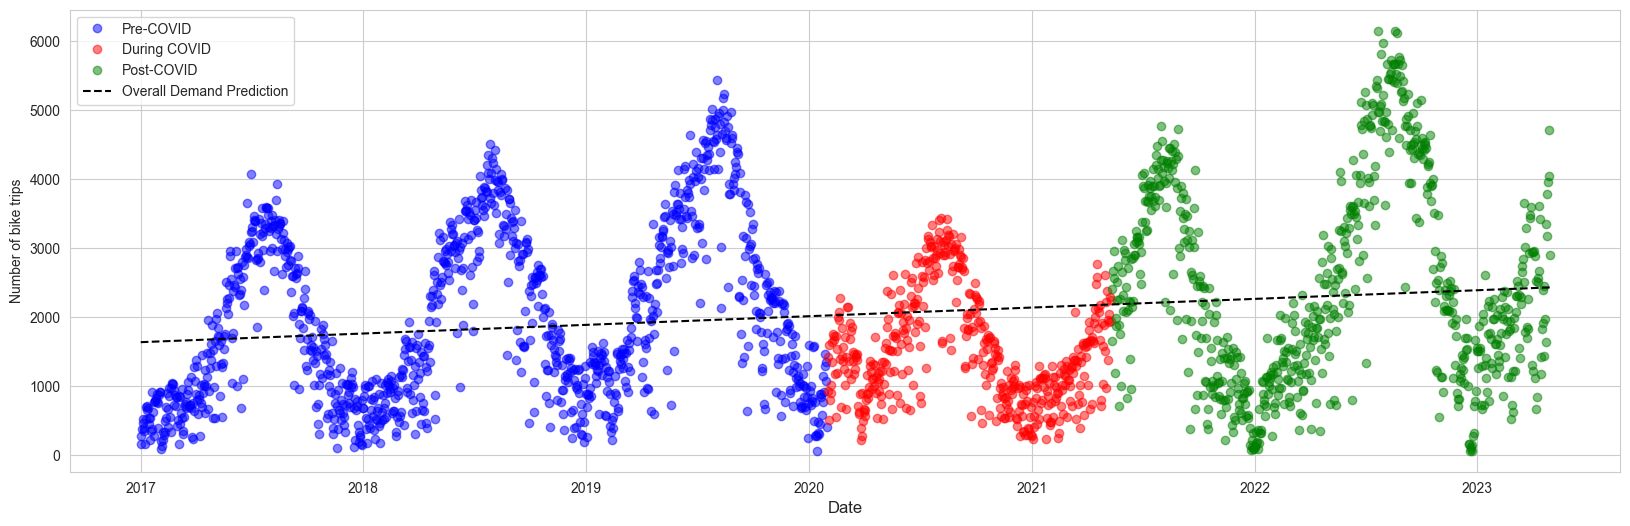

In [15]:
plt.figure(figsize=(20,6))

plt.plot(bike_train_precovid.Date,
        bike_train_precovid.num_trips,
        'bo',
        alpha=0.5,
        label='Pre-COVID')

plt.plot(bike_train_duringcovid.Date,
           bike_train_duringcovid.num_trips,
           'ro',
           alpha=0.5,
           label='During COVID')

plt.plot(bike_train_postcovid.Date,
           bike_train_postcovid.num_trips,
           'go',
           alpha=0.5,
           label='Post-COVID')

plt.plot(bikeshare.Date,
        demand_trend,
        'k--',
        label='Overall Demand Prediction')

plt.xlabel('Date',fontsize=12)
plt.ylabel('Number of bike trips')
plt.legend()

plt.show()

## Comparing to a non-linear demand fit

We will do polynomial regression on the trend from 2018-01 to 2024-05, with degrees ranging from 3 to 6. The corresponding RMSEs are found at the end of this subsection.

In [16]:
import matplotlib.ticker as ticker
from datetime import date, datetime, timedelta

In [17]:
#split the date into the following columns: Year-Month, Year, Month, Day
def get_year(date_str):
    return(date_str.split('-')[0])
def get_month(date_str):
    return(date_str.split('-')[1])
def get_day(date_str):
    return(date_str.split('-')[2])
def get_year_month(date_str):
    return ('-'.join((date_str.split('-')[0],date_str.split('-')[1])))

def str_to_date(s):
    return (datetime.strptime(s,'%Y-%m'))

In [18]:
## The code used in this subsection was written to take the dates in as strings, not datetime objects, so re-read in the training data
bike_train = pd.read_csv('./bikeshare_train_data.csv')

bike_train['Year-Month'] = bike_train['Date'].apply(get_year_month)
bike_train['Year'] = bike_train['Date'].apply(get_year)
bike_train['Month'] = bike_train['Date'].apply(get_month)
bike_train['Day'] = bike_train['Date'].apply(get_day)

In [19]:
# Some years have one more day in February
bike_train.groupby('Year-Month').count().loc[['2017-02','2018-02','2019-02','2020-02','2021-02','2022-02','2023-02']]

,Date,day_length,min_temp,max_temp,mean_temp,temp_diff,hdd,cdd,rain,snow,...,mean_ret_temp,mean_ride_temp,total_dist,total_duration,ebike_trips,num_trips,adj_num_trips,Year,Month,Day
Year-Month,,,,,,,,,,,,,,,,,,,,,
2017-02,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2018-02,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2019-02,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2020-02,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
2021-02,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2022-02,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
2023-02,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


2020-02 has 29 days, so we will remove that day.

In [20]:
bike_daily = bike_train.copy()
bike_daily.set_index('Date',inplace=True)
bike_daily.drop('2020-02-29',inplace=True)

Now difference the data using the first year as a baseline to remove seasonality so we can examine trend by itself.

In [21]:
bike_daily['diff'] = np.nan

for index in bike_daily.index:
    if bike_daily.loc[index,'Year'] > '2017':
        prev_index = '2017-' + index[5:]
        bike_daily.loc[index,'diff'] = bike_daily.loc[index,'num_trips'] - bike_daily.loc[prev_index,'num_trips']

daily_diff = bike_daily.iloc[365:]['diff']
daily_diff = daily_diff.to_frame()

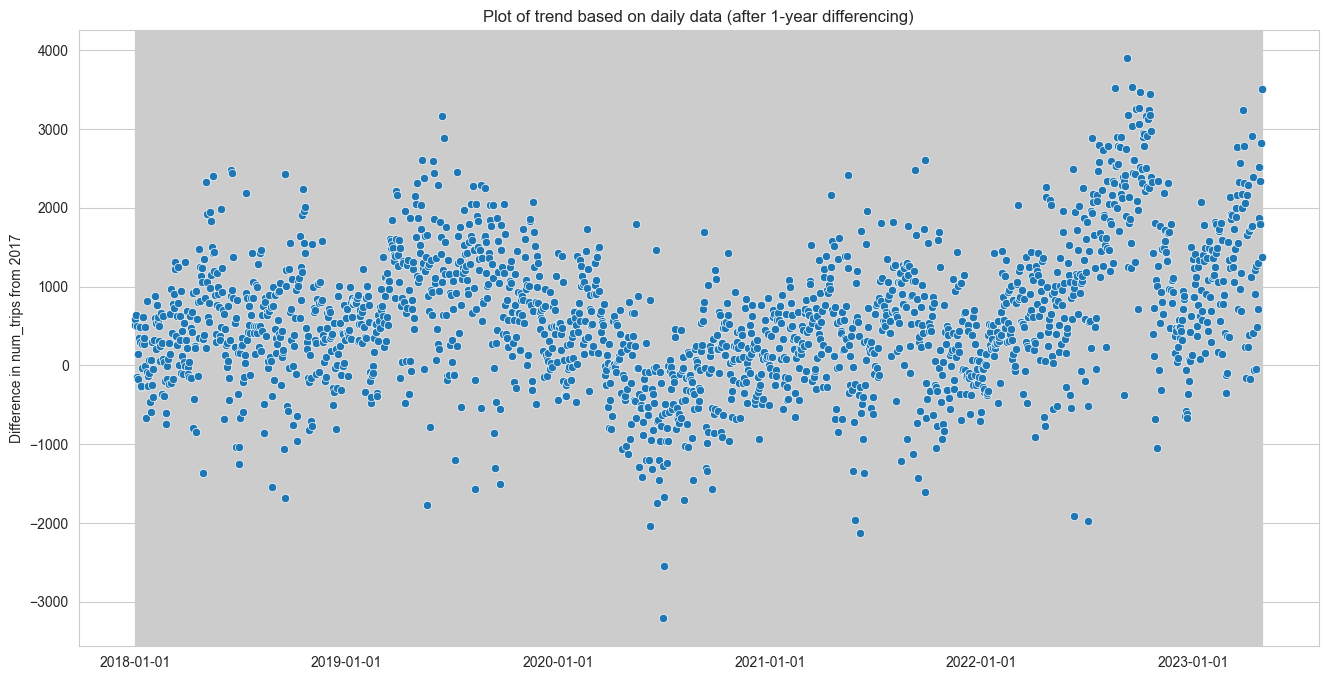

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(8)
fig.set_figwidth(16)

sns.scatterplot(x=np.arange(len(daily_diff)), y=daily_diff['diff'])
ax.set_xticks(np.arange(len(daily_diff)))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
ax.set_xticklabels(daily_diff.index)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 365 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plt.title('Plot of trend based on daily data (after 1-year differencing)')
plt.ylabel('Difference in num_trips from 2017')
plt.show()

Now we can examine different degrees of polynomial regression. We have implemented this on the entire training set so that all dates line up with their year-differenced dates.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

daily_diff['time'] = np.arange(len(daily_diff))
mses = []

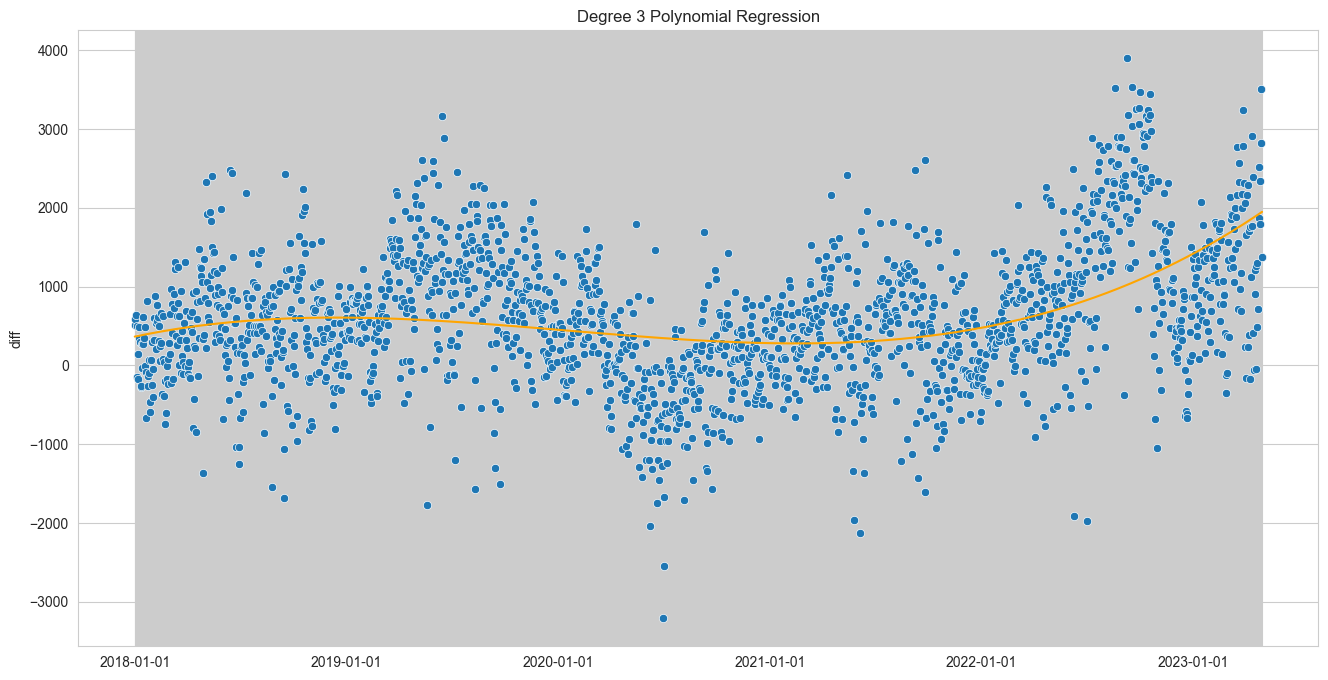

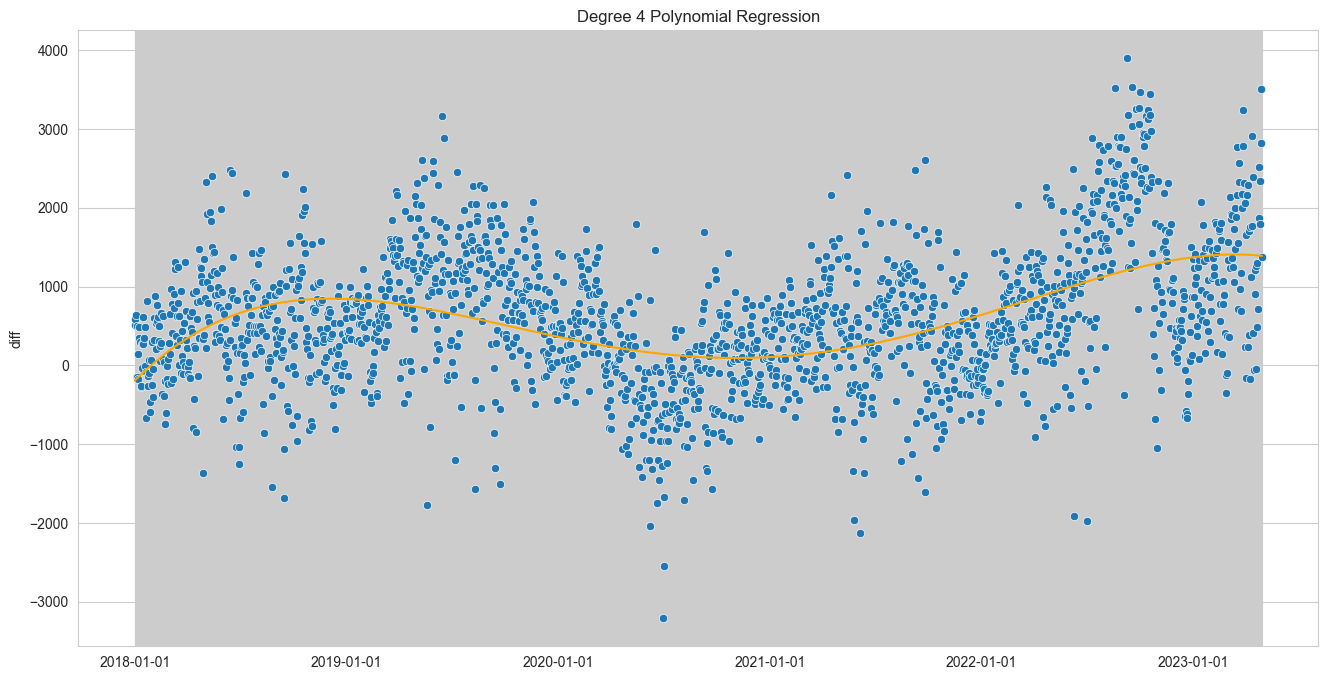

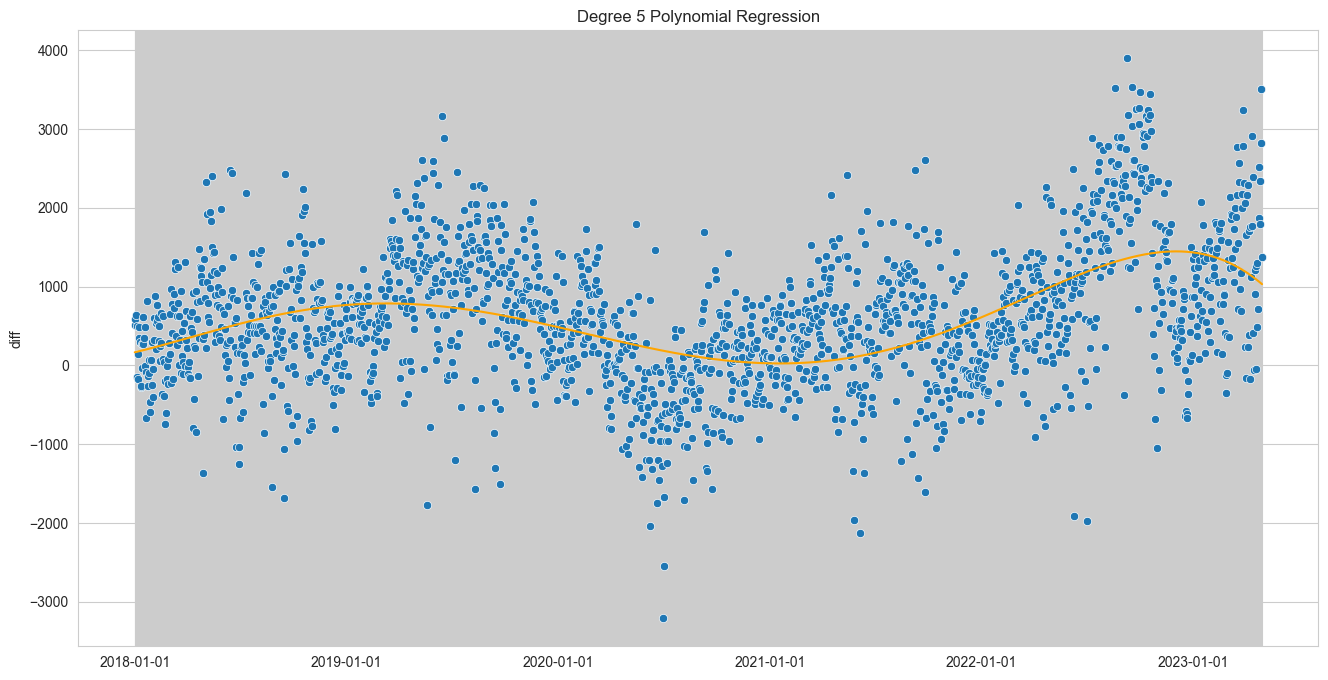

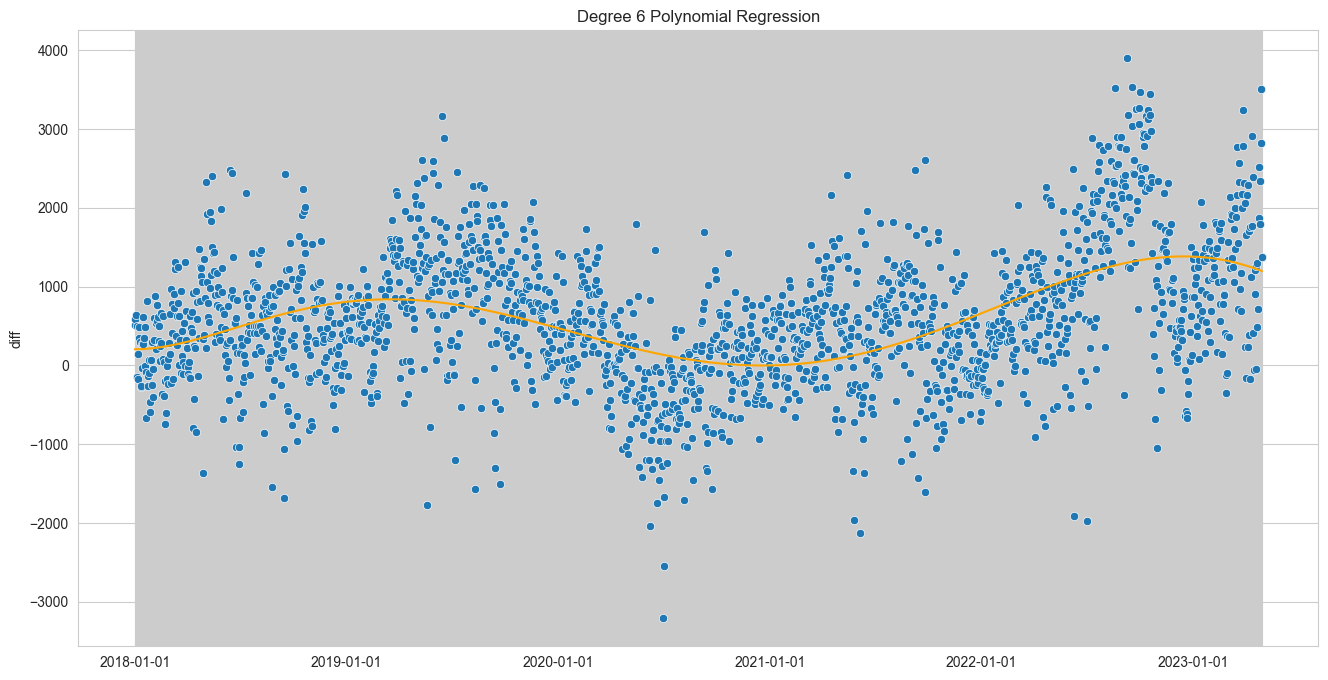

In [24]:
for k in range(3,7):
# k is degree of the polynomial 
    poly = PolynomialFeatures(k)
    reg = LinearRegression()
    reg.fit(poly.fit_transform(daily_diff[['time']]), daily_diff['diff'])
    pred = reg.predict(poly.fit_transform(daily_diff[['time']]))
    
    #Store the trend model in daily_diff['k_deg_trend']
    daily_diff[f'{k}_deg_trend'] = pred
    mses.append(np.sqrt(mean_squared_error(pred,daily_diff['diff'])))
    
    #Plot the k degree regression plot
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_figheight(8)
    fig.set_figwidth(16)

    sns.scatterplot(x=np.arange(len(daily_diff)), y=daily_diff['diff'])
    sns.lineplot(x=np.arange(len(daily_diff)), y=pred, color='orange')

    ax.set_xticks(np.arange(len(daily_diff)))
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
    ax.set_xticklabels(daily_diff.index)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 365 == 0:  # every 365th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
        
    plt.title(f'Degree {k} Polynomial Regression')
    plt.show()

The RMSEs from degree 3 to degree 6 are:

In [25]:
for i in range(3,7):
    print(f'The RMSE of degree {i} polynomial regression is {mses[i-3]}')

The RMSE of degree 3 polynomial regression is 805.3184872483489
The RMSE of degree 4 polynomial regression is 783.3435262043236
The RMSE of degree 5 polynomial regression is 775.7360063203562
The RMSE of degree 6 polynomial regression is 773.9600914254851


We can see that degrees 4-6, while having lower RMSEs, look overfit to the data. The degree-3 polynomial fit is the best and does much better at predicting base demand than the ``Overall`` linear trend in the previous section. Hence we can update our ``demand_trend`` to this one.

In [26]:
## Re-insert 2020-02-29 so we don't have to delete it from our dataset
pre_feb29 = daily_diff.loc[(daily_diff.index <= '2020-02-28')]
post_feb29 = daily_diff.loc[(daily_diff.index >= '2020-03-01')]
line_feb29 = pd.DataFrame({
    'diff': np.nan,
    'time': 789.5,
    '3_deg_trend': (pre_feb29['3_deg_trend'].iloc[-1] + post_feb29['3_deg_trend'].iloc[0])/2,
    '4_deg_trend': np.nan,
    '5_deg_trend': np.nan,
    '6_deg_trend': np.nan
}, index=['2020-02-29'])
daily_diff = pd.concat([pre_feb29, line_feb29, post_feb29])

In [27]:
daily_diff

,diff,time,3_deg_trend,4_deg_trend,5_deg_trend,6_deg_trend
2018-01-01,517.0,0.0,365.779289,-191.878727,166.797342,205.116795
2018-01-02,583.0,1.0,367.325807,-184.594989,168.548339,205.132138
2018-01-03,637.0,2.0,368.866511,-177.343639,170.306811,205.177493
2018-01-04,506.0,3.0,370.401410,-170.124607,172.072666,205.252611
2018-01-05,-151.0,4.0,371.930510,-162.937819,173.845811,205.357244
...,...,...,...,...,...,...
2023-04-26,1798.0,1940.0,1928.627590,1393.762112,1055.988641,1208.396326
2023-04-27,2342.0,1941.0,1933.597069,1393.073905,1049.882999,1205.615433
2023-04-28,2818.0,1942.0,1938.575898,1392.368601,1043.720717,1202.811449
2023-04-29,3510.0,1943.0,1943.564084,1391.646144,1037.501575,1199.984357


In [28]:
demand_trend = np.zeros(len(bikeshare))
demand_trend[365:] = daily_diff['3_deg_trend'].values

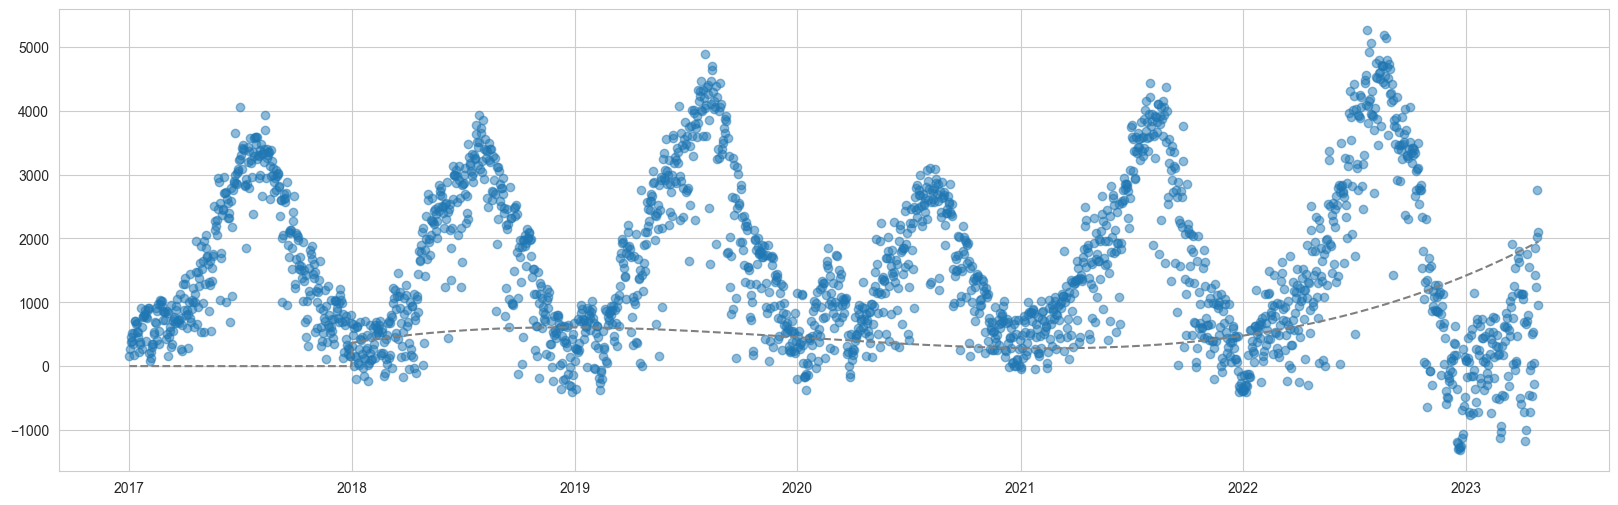

In [29]:
plt.figure(figsize=(20,6))

plt.plot(bikeshare.Date,
        bikeshare.num_trips - demand_trend,
        'o',
        alpha=0.5)

plt.plot(bikeshare.Date,
         1*demand_trend,
         color='gray',
         linestyle='--')

plt.show()

Remove this trend from ``bikeshare``.

In [30]:
bikeshare['adj_num_trips'] = bikeshare.num_trips - demand_trend
print('The shifted amount is', bikeshare['adj_num_trips'].values.min())
## Shift up so that min value is 0
bikeshare.adj_num_trips += np.abs(bikeshare.iloc[np.argmin(bikeshare.adj_num_trips)].adj_num_trips)
## Put these values in bike_tt
bike_tt = bikeshare.loc[bike_tt.index]

The shifted amount is -1318.3332525370422


In [38]:
bikeshare.adj_num_trips.describe()

count    2311.000000
mean     2846.841498
std      1253.496658
min         0.000000
25%      1871.333252
50%      2525.304631
75%      3806.695363
max      6579.223677
Name: adj_num_trips, dtype: float64

Thus ``adj_num_trips`` is a scaled version of ``num_trips``, where we have taken ``num_trips`` and subtracted off our chosen trend and then shifted upwards so that "0" means the minimum number of bike trips between 2017-01 and 2023-05 (one can check that this is 64).

## Testing if initial seasonality is explained by temperature

To test this, we can perform a simple regression of ``adj_num_trips`` on temperature (say, ``max_temp``; see below for why ``max_temp`` may be the optimal temperature feature to use). Then we plot the initial data as a time series where we also place this regression model's prediction on the temperature of each day on this plot and see how much overlap we get.

In [39]:
slr = LinearRegression()
slr.fit(bike_tt.max_temp.values.reshape(-1,1),
       bike_tt.adj_num_trips)
preds_on_max_temp = slr.predict(bikeshare.max_temp.values.reshape(-1,1))

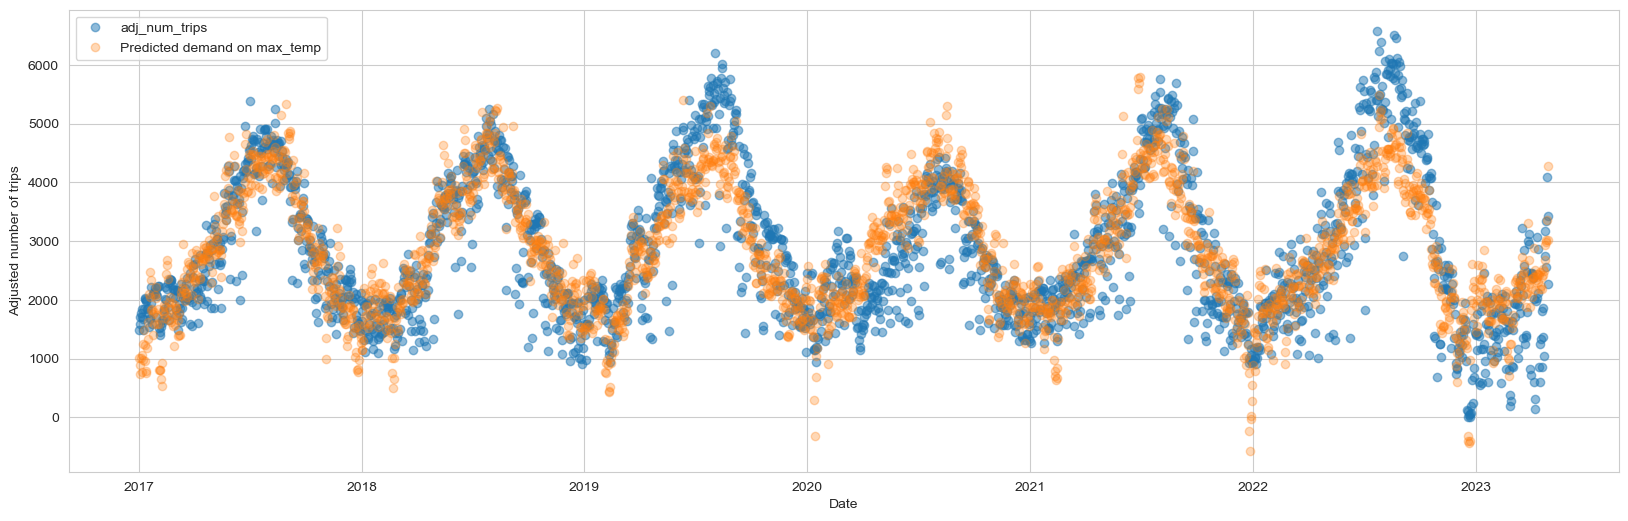

In [40]:
plt.figure(figsize=(20,6))

plt.plot(bikeshare.Date,
        bikeshare.adj_num_trips,
        'o',
        alpha=0.5,
        label='adj_num_trips')

plt.plot(bikeshare.Date,
        preds_on_max_temp,
         'o',
         alpha=0.3,
        label='Predicted demand on max_temp')

plt.xlabel('Date')
plt.ylabel('Adjusted number of trips')
plt.legend()

plt.show()

It looks like the weather data "bakes in" the seasonality of our data.

## Feature Analysis

In [41]:
bike_tt.sample(5, random_state=604)

,Date,day_length,min_temp,max_temp,mean_temp,temp_diff,hdd,cdd,rain,snow,...,snow_on_ground,max_gust,mean_dep_temp,mean_ret_temp,mean_ride_temp,total_dist,total_duration,ebike_trips,num_trips,adj_num_trips
1438,2020-12-09,497.133333,4.2,9.8,7.0,5.6,11.0,0.0,0.3,0.0,...,0.0,0.0,9.753878,10.626680,10.190279,2349113.00,1280302.0,0.0,967,1998.675785
2145,2022-11-16,544.150000,1.2,5.3,3.3,4.1,14.7,0.0,0.0,0.0,...,0.0,0.0,5.327603,6.158071,5.742837,4669769.34,1785578.0,586.0,2094,2167.392173
1813,2021-12-19,491.133333,-2.5,5.8,1.7,8.3,16.3,0.0,0.0,0.0,...,0.0,0.0,1.700000,1.700000,1.700000,2500966.67,1137499.0,0.0,928,1786.107705
1923,2022-04-08,799.216667,6.8,11.8,9.3,5.0,8.7,0.0,4.4,0.0,...,0.0,26.0,12.727433,13.296014,13.011723,4297837.00,1772972.0,0.0,1706,2385.193630
907,2019-06-27,973.266667,13.2,20.3,16.8,7.1,1.2,0.0,15.4,0.0,...,0.0,2.0,19.947949,20.693209,20.320579,7215563.67,3230609.0,0.0,2901,3661.417560


In [42]:
temp_features = ['min_temp', 'max_temp', 'mean_temp', 'temp_diff',
       'hdd', 'cdd', 'mean_dep_temp', 'mean_ret_temp', 'mean_ride_temp']
weather_features = ['rain', 'snow', 'total_precip', 'snow_on_ground',
       'max_gust']

In [43]:
bike_tt[temp_features + ['adj_num_trips']].corr()

,min_temp,max_temp,mean_temp,temp_diff,hdd,cdd,mean_dep_temp,mean_ret_temp,mean_ride_temp,adj_num_trips
min_temp,1.000000,0.907445,0.972913,0.111312,-0.970781,0.451312,0.879265,0.889695,0.884660,0.708853
max_temp,0.907445,1.000000,0.979974,0.518570,-0.969254,0.518117,0.979825,0.982348,0.981371,0.851258
mean_temp,0.972913,0.979974,1.000000,0.337978,-0.993135,0.498517,0.955478,0.961818,0.958890,0.803986
temp_diff,0.111312,0.518570,0.337978,1.000000,-0.316961,0.307040,0.528197,0.512940,0.520875,0.570894
hdd,-0.970781,-0.969254,-0.993135,-0.316961,1.000000,-0.393689,-0.946569,-0.953355,-0.950197,-0.791654
cdd,0.451312,0.518117,0.498517,0.307040,-0.393689,1.000000,0.493730,0.493263,0.493656,0.451281
mean_dep_temp,0.879265,0.979825,0.955478,0.528197,-0.946569,0.493730,1.000000,0.998745,0.999698,0.873163
mean_ret_temp,0.889695,0.982348,0.961818,0.512940,-0.953355,0.493263,0.998745,1.000000,0.999674,0.867724
mean_ride_temp,0.884660,0.981371,0.958890,0.520875,-0.950197,0.493656,0.999698,0.999674,1.000000,0.870767
adj_num_trips,0.708853,0.851258,0.803986,0.570894,-0.791654,0.451281,0.873163,0.867724,0.870767,1.000000


Initial observations:
- The ``mean_dep/ret/ride_temp`` are all highly correlated with each other and extremely highly correlated with ``max_temp`` (and ``mean_temp``, but slightly less so). This is probably because minimum temperatures tend to occur during nighttime hours, when people are less likely to need a bike and most riding occurs during the warmer hours of the day since those are the hours of the day when people do things/work.
- Further still, of the five of these, ``max_temp`` and ``mean_dep/ret/ride_temp`` have about the same correlation with ``adj_num_trips``, and this correlation is higher than ``min/mean_temp`` with ``adj_num_trips``.
- ``hdd`` is more highly correlated with the other temperature features and ``adj_num_trips`` than ``cdd`` is.
- ``temp_diff`` is not as strongly correlated with the rest of the temperature features. It has some reasonable correlation with ``adj_num_trips``.

These observations suggest that we could decrease the dimension of our feature space by considering ``max_temp`` in place of the originally six temperature features ``min/max/mean_temp`` and ``mean_dep/ret/ride_temp``. We may wish to keep ``temp_diff``,``hdd``, and ``cdd`` in consideration at this time with an expectation that all of these features may not remain in the final model.

We can also perform Lasso regression to inform some more feature selection; let's do that after we look at some other features.

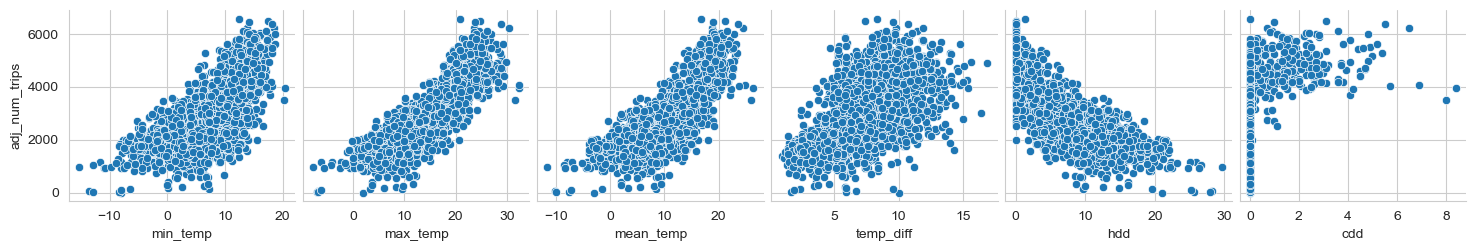

In [44]:
sns.pairplot(data=bike_tt,
            x_vars=['min_temp','max_temp','mean_temp','temp_diff','hdd','cdd'],
            y_vars=['adj_num_trips'])

plt.show()

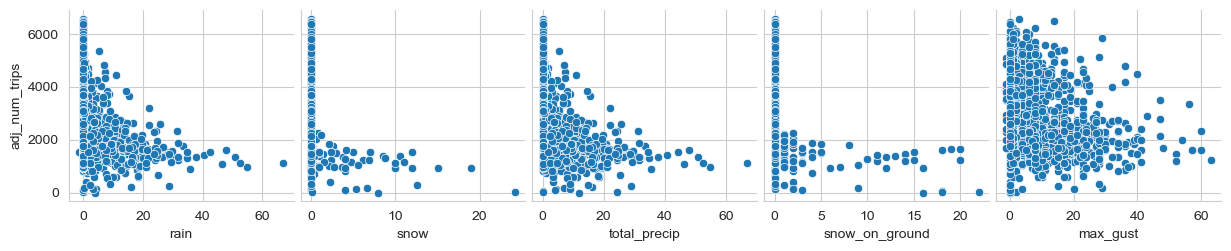

In [45]:
sns.pairplot(data=bike_tt,
             x_vars=weather_features,
             y_vars=['adj_num_trips'])

plt.show()

In [46]:
bike_tt[weather_features + ['adj_num_trips']].corr()

,rain,snow,total_precip,snow_on_ground,max_gust,adj_num_trips
rain,1.000000,-0.019430,0.980909,-0.012690,0.301171,-0.403446
snow,-0.019430,1.000000,0.155850,0.522900,0.020332,-0.181056
total_precip,0.980909,0.155850,1.000000,0.085740,0.299885,-0.430995
snow_on_ground,-0.012690,0.522900,0.085740,1.000000,0.004682,-0.190929
max_gust,0.301171,0.020332,0.299885,0.004682,1.000000,-0.221488
adj_num_trips,-0.403446,-0.181056,-0.430995,-0.190929,-0.221488,1.000000


In [47]:
bike_tt.loc[bike_tt.total_precip > 0, weather_features + ['adj_num_trips']].corr()

,rain,snow,total_precip,snow_on_ground,max_gust,adj_num_trips
rain,1.000000,-0.101499,0.974251,-0.077291,0.237099,-0.314915
snow,-0.101499,1.000000,0.102267,0.580381,-0.021439,-0.236489
total_precip,0.974251,0.102267,1.000000,0.049865,0.230649,-0.363897
snow_on_ground,-0.077291,0.580381,0.049865,1.000000,-0.030448,-0.217964
max_gust,0.237099,-0.021439,0.230649,-0.030448,1.000000,-0.179335
adj_num_trips,-0.314915,-0.236489,-0.363897,-0.217964,-0.179335,1.000000


We can see that these other non-temperature variables are much less correlated with ``adj_num_trips`` than the temperature variables were, and this does not change much if we restrict to days where there is nonzero precipitation. There is not much ``snow`` impact visible, nor ``snow_on_ground`` impact, but this may be explained by temperature (snow in colder months) anyway, and we do not have many snow days (in ``bike_tt`` there are only 59 days with nonzero snow and only 38 days with more than 2cm of snow).

Now let us see what Lasso regression says about features. (The warnings below are likely because some of the features we're using are collinear.)

In [48]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
alphas = [0.000001,.00001,.0001,.001,.01,.1,.25,.5,.75,1,5,10,25,50,100,1000,10000]
features = ['max_temp', 'mean_temp', 'temp_diff', 'hdd', 'cdd'] + weather_features
coefs = np.zeros((len(alphas),len(features)))

for i, alpha in enumerate(alphas):
    pipe = Pipeline([('scale',StandardScaler()),
                    ('lasso',Lasso(alpha=alpha, max_iter=1000000))])
    pipe.fit(bike_tt[features], bike_tt.adj_num_trips)
    coefs[i,:] = pipe['lasso'].coef_

C:\Users\keith\anaconda3\envs\erdos_may_2024\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.087e+06, tolerance: 3.133e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\keith\anaconda3\envs\erdos_may_2024\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.087e+06, tolerance: 3.133e+05
  model = cd_fast.enet_coordinate_descent(


In [50]:
lasso_results = pd.DataFrame(data=coefs, index=alphas, columns=features)
lasso_results

,max_temp,mean_temp,temp_diff,hdd,cdd,rain,snow,total_precip,snow_on_ground,max_gust
0.000001,2241.343556,-1214.557853,-173.017015,-56.057738,6.103644,-43.801167,37.309834,-233.549044,9.747311,-48.409971
0.000010,2241.348242,-1195.421402,-173.017991,-38.007351,3.667894,-43.801411,37.309783,-233.548785,9.747298,-48.409963
0.000100,2238.243212,-1152.297539,-172.361651,0.000000,-1.459725,-43.802708,37.309815,-233.548026,9.748296,-48.410242
0.001000,2136.095936,-1059.500715,-150.772016,0.000000,-1.426404,-43.789280,37.322208,-233.582506,9.783855,-48.421399
0.010000,1395.876050,-387.034824,5.655264,0.000000,-1.178421,-43.751601,37.399986,-233.777825,10.040033,-48.502301
0.100000,969.622424,0.000000,95.688339,-0.000000,-0.828859,-48.864381,36.464860,-228.649542,10.051990,-48.475680
0.250000,969.231303,0.000000,95.686273,-0.000000,-0.463265,-56.972548,34.900587,-220.362703,9.821283,-48.349048
0.500000,968.658039,0.000000,95.686530,-0.000000,-0.000000,-69.953789,32.394214,-207.088319,9.451263,-48.143667
0.750000,968.350206,0.000000,95.683914,-0.000000,-0.000000,-76.585194,31.016145,-200.218066,9.169757,-47.968292
1.000000,968.042741,0.000000,95.680968,-0.000000,-0.000000,-83.111168,29.656369,-193.454138,8.889214,-47.793187


According to this the features we might consider keeping are ``max_temp``, ``temp_diff``,``total_precip`` or ``rain``, ``snow_on_ground``, and ``max_gust``. This lines up rather well with our what the combination of our correlation matrices, plots, and known collinearities suggest.

Let us just save the ``bikeshare`` now that we have added the column ``adj_num_trips`` as our goal output variable to predict.

In [51]:
bikeshare.to_csv('bikeshare_train_data.csv', index=False, index_label='Date')